# Importing Libraries

In [0]:
#Pandas is the most popular python library that is used for data analysis.
import pandas as pd

#Numpy is a general-purpose array-processing package. 
#It provides a high-performance multidimensional array object, and tools for working with these arrays.
import numpy as np

#OS module in python provides functions for interacting with the operating system. 
#OS, comes under Python’s standard utility modules. 
#This module provides a portable way of using operating system dependent functionality.
import os

#Matplotlib is a multi-platform data visualization library built on NumPy arrays and designed to work with broader SciPy stack.
import matplotlib.pyplot as plt

#Seaborn is a Python data visualization library based on Matplotlib. 
#It provides a high-level interface for drawing attractive and informative statistical graphics.
import seaborn as sns

#files.upload returns a dictionary of the files which were uploaded. 
#The dictionary is keyed by the file name and values are the data which were uploaded.
from google.colab import files

# io module allows us to manage the file-related input and output operations.
import io

# Reading a file using Pandas

In [61]:
uploaded = files.upload()

Saving Sample - Superstore Sales.xls to Sample - Superstore Sales.xls


In [62]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "Sample - Superstore Sales.xls" with length 3026944 bytes


In [0]:
df=pd.read_excel(io.BytesIO(uploaded['Sample - Superstore Sales.xls']))

In [73]:
df.shape
print(df.head(3))
df.columns
df.dtypes

   Row ID  Order ID  ... Product Base Margin  Ship Date
0       1         3  ...                0.80 2010-10-20
1      49       293  ...                0.58 2012-10-02
2      50       293  ...                0.39 2012-10-03

[3 rows x 21 columns]


Row ID                           int64
Order ID                         int64
Order Date              datetime64[ns]
Order Priority                  object
Order Quantity                   int64
Sales                          float64
Discount                       float64
Ship Mode                       object
Profit                         float64
Unit Price                     float64
Shipping Cost                  float64
Customer Name                   object
Province                        object
Region                          object
Customer Segment                object
Product Category                object
Product Sub-Category            object
Product Name                    object
Product Container               object
Product Base Margin            float64
Ship Date               datetime64[ns]
dtype: object

# Profit Earned by Customers

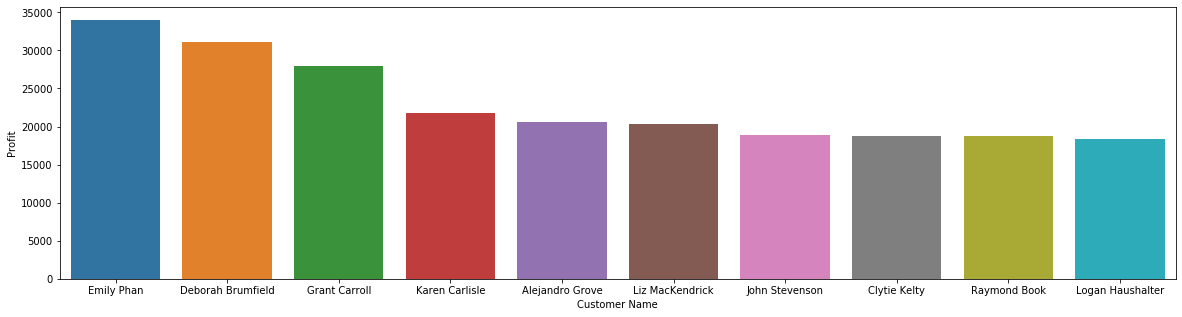

In [74]:
#Pandas dataframe. groupby() function is used to split the data into groups based on some criteria.
result=df.groupby(["Customer Name"])['Profit'].aggregate(np.sum).reset_index().sort_values('Profit',ascending=False).head(10)
fig = plt.figure(figsize=(20,5))
result.head
type(result)
result.shape
result
sns.barplot(x="Customer Name", y="Profit", data=result)

# Displaying top 10 Profitbale Customers

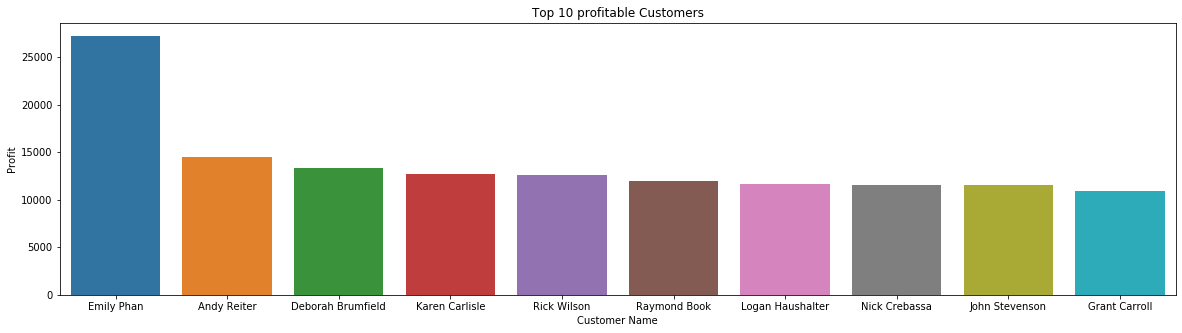

In [75]:
#Pandas sort_values() function sorts a data frame in Ascending or Descending order of passed Column. 
sortedTop10=df.sort_values(['Profit'], ascending=False).head(10)
fig = plt.figure(figsize=(20,5))

#The Matplotlib subplot() function can be called to plot two or more plots in one figure.
ax=fig.add_subplot(111)
p=sns.barplot(x='Customer Name',y='Profit',data=sortedTop10, ax=ax)
ax.set_title("Top 10 profitable Customers")

#plt.show() will display the current figure that you are working on.
plt.show()

# Top-10 oldest customers

In [76]:
oldCustomers = df.sort_values(["Order Date"], ascending=True).iloc[0:10,11]
oldCustomers

3142       Matt Collister
4376       Jessica Myrick
7055    Alan Schoenberger
7056    Alan Schoenberger
7057    Alan Schoenberger
7150    Elizabeth Moffitt
7149    Elizabeth Moffitt
1357       David Philippe
1760       Bill Donatelli
5608          Andy Reiter
Name: Customer Name, dtype: object

# Relationship of Order Priority and Profit

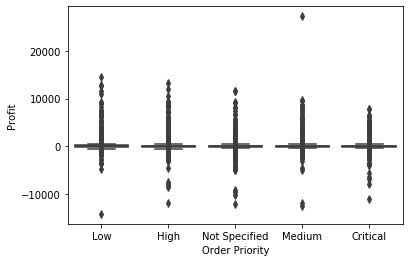

In [77]:
df['Order Priority'].value_counts()
sns.boxplot( "Order Priority","Profit",data= df)
#There does not appear to be any relationship between Order Priority & Profit

# Relationship between sales and profit

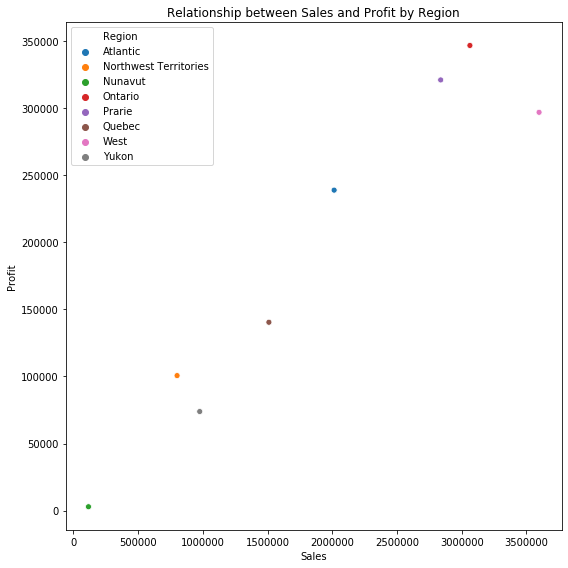

In [78]:
regionwiseSalesAndProfit = df.groupby("Region").agg({"Sales":np.sum, "Profit": np.sum})
regionwiseSalesAndProfit
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
p = sns.scatterplot(x="Sales", y="Profit", hue=regionwiseSalesAndProfit.index, data=regionwiseSalesAndProfit) # kind="scatter")
ax.set_title("Relationship between Sales and Profit by Region")
plt.tight_layout()
plt.show()